In [44]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import cv2
import Augmentor

In [45]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'train'
p = Augmentor.Pipeline('train')


Initialised with 5219 image(s) found.
Output directory set to train\output.

In [47]:
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(10)


Processing <PIL.Image.Image image mode=L size=176x208 at 0x240BAD1F490>: 100%|██| 10/10 [00:00<00:00, 603.87 Samples/s]


In [4]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [48]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [49]:
for layer in inception.layers:
    layer.trainable = False

In [50]:
folders = glob('Train/*')
folders

['Train\\MildDemented',
 'Train\\ModerateDemented',
 'Train\\NonDemented',
 'Train\\Normal',
 'Train\\output',
 'Train\\VeryMildDemented']

In [51]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [52]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [53]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [54]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
# Training Generator
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5244 images belonging to 6 classes.


In [56]:
# Testing Generator
test_set = test_datagen.flow_from_directory('Train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5244 images belonging to 6 classes.


In [57]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_4468\2470280257.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
164/164 [==============================] - 186s 1s/step - loss: 3.2979 - accuracy: 0.5168 - val_loss: 2.4434 - val_accuracy: 0.5887
Epoch 2/100
164/164 [==============================] - 183s 1s/step - loss: 2.2080 - accuracy: 0.5961 - val_loss: 2.6474 - val_accuracy: 0.6243
Epoch 3/100
164/164 [==============================] - 183s 1s/step - loss: 2.1507 - accuracy: 0.6091 - val_loss: 1.1425 - val_accuracy: 0.7233
Epoch 4/100
164/164 [==============================] - 186s 1s/step - loss: 1.6093 - accuracy: 0.6611 - val_loss: 0.9558 - val_accuracy: 0.7292
Epoch 5/100
164/164 [==============================] - 176s 1s/step - loss: 1.7125 - accuracy: 0.6524 - val_loss: 0.9533 - val_accuracy: 0.7588
Epoch 6/100
164/164 [==============================] - 183s 1s/step - loss: 1.8005 - accuracy: 0.6764 - val_loss: 1.2116 - val_accuracy: 0.7372
Epoch 7/100
164/164 [==============================] - 182s 1s/step - loss: 2.3396 - accuracy: 0.6510 - val_loss: 1.1404 - val_accuracy:

In [59]:
from sklearn.metrics import classification_report
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Convert true labels to class labels
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

164/164 [==============================] - 87s 528ms/step
                  precision    recall  f1-score   support

    MildDemented       0.13      0.07      0.09       717
ModerateDemented       0.00      0.00      0.00        52
     NonDemented       0.49      0.49      0.49      2560
          Normal       0.03      0.03      0.03        98
VeryMildDemented       0.34      0.39      0.36      1792
          output       0.00      0.00      0.00        25

        accuracy                           0.39      5244
       macro avg       0.16      0.17      0.16      5244
    weighted avg       0.37      0.39      0.38      5244



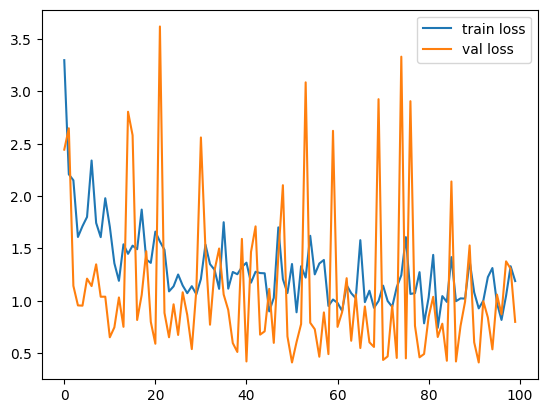

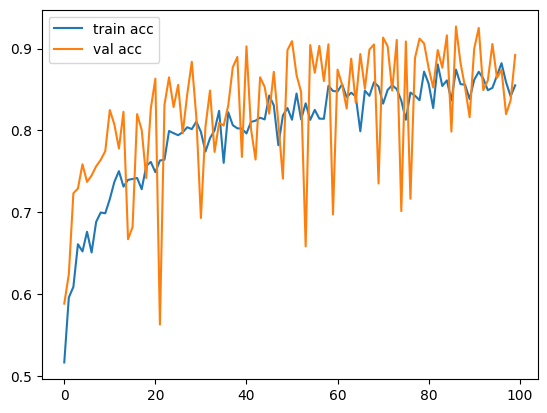

<Figure size 640x480 with 0 Axes>

In [58]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [60]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
y_pred = model.predict(test_set)
y_pred

164/164 [==============================] - 93s 565ms/step


array([[5.1244572e-30, 0.0000000e+00, 9.9990749e-01, 0.0000000e+00,
        9.2493079e-05, 0.0000000e+00],
       [8.6976698e-23, 0.0000000e+00, 7.1933609e-10, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.6420408e-17, 0.0000000e+00, 1.2060241e-05, 0.0000000e+00,
        9.9998796e-01, 0.0000000e+00],
       ...,
       [3.7413560e-25, 0.0000000e+00, 5.4307744e-05, 0.0000000e+00,
        9.9994564e-01, 0.0000000e+00],
       [9.5899249e-15, 0.0000000e+00, 9.9999380e-01, 0.0000000e+00,
        6.2190670e-06, 0.0000000e+00],
       [7.1697501e-16, 0.0000000e+00, 9.9999976e-01, 0.0000000e+00,
        2.1302775e-07, 0.0000000e+00]], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

AxisError: axis 1 is out of bounds for array of dimension 1